In [1]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [6]:
# Load dataset
data = pd.read_csv('training.1600000.processed.noemoticon.csv',encoding='latin1',header=None)  # Replace with your file path
data.columns = ['target', 'id', 'date', 'flag', 'user', 'text']
# Display first few rows
print(data.head())



   target          id                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  


In [7]:
print(data.columns)

Index(['target', 'id', 'date', 'flag', 'user', 'text'], dtype='object')


In [8]:
# Data Cleaning
def clean_text(text):
    text = re.sub(r'http\S+', '', text)                   # remove URLs
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)            # remove mentions
    text = re.sub(r'#', '', text)                         # remove hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text)               # remove special chars
    text = text.lower().strip()                           # lowercase + strip
    return text

data['clean_text'] = data['text'].apply(clean_text)


In [10]:
#Encode Labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['sentiment'] = le.fit_transform(data['target'])

In [11]:
# Train and test split
X = data['clean_text']
y = data['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [13]:
# Model Training
model = LogisticRegression(max_iter=200)
model.fit(X_train_vec, y_train)


LogisticRegression(max_iter=200)

Accuracy: 0.765384375

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.74      0.76    159494
           1       0.75      0.79      0.77    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



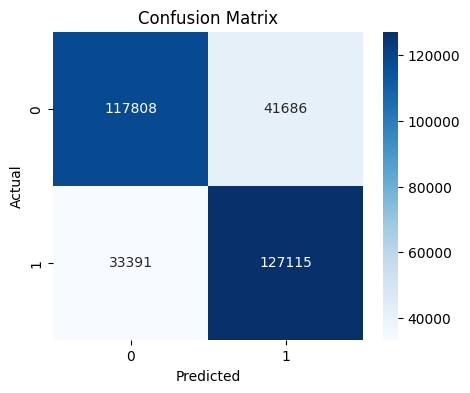

In [14]:
# Model Evalution
y_pred = model.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [15]:
#predict sentiment for new tweet
def predict_sentiment(text):
    cleaned = clean_text(text)
    vec = vectorizer.transform([cleaned])
    pred = model.predict(vec)[0]
    label = le.inverse_transform([pred])[0]
    return label

# Example
tweet = "I love using AI models for fun projects!"
print("Tweet Sentiment:", predict_sentiment(tweet))


Tweet Sentiment: 4


In [16]:
# save the model
import joblib
joblib.dump(model, 'tweet_sentiment_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']